In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/german_credit_data.csv', index_col = False)

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

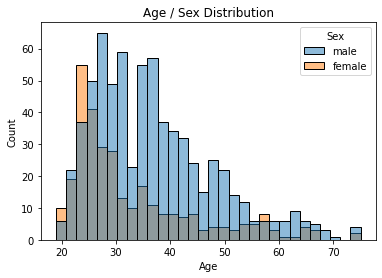

In [8]:
fig = sns.histplot(df, x='Age', hue='Sex', bins=30).set_title('Age / Sex Distribution')

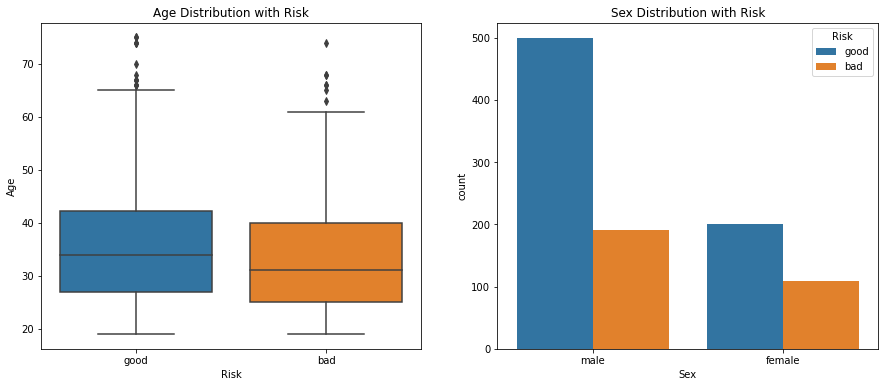

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig = sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title('Age Distribution with Risk')
fig = sns.countplot(x='Sex', hue='Risk', data=df, ax=ax[1]).set_title('Sex Distribution with Risk')

* Age doesn't affect Risk.
* Males have better ratio for Risk. 

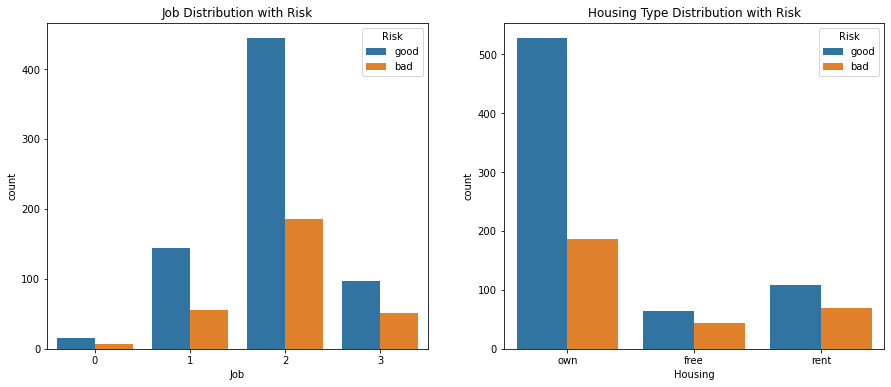

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig = sns.countplot(x='Job',hue='Risk', data=df, ax=ax[0]).set_title('Job Distribution with Risk')
fig = sns.countplot(x='Housing',hue='Risk', data=df, ax=ax[1]).set_title('Housing Type Distribution with Risk')

* Most of people in records have job skill level 2, but the job skill level does not affect the risk rating much.
* People who own a house means low risk and good rating to the bank.

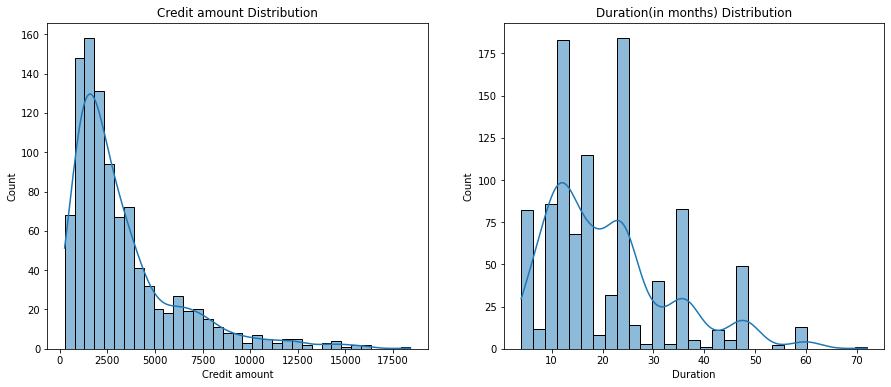

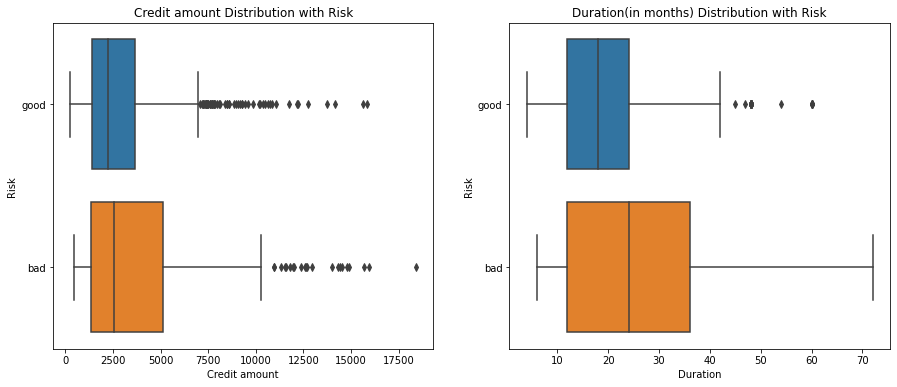

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig = sns.histplot(x='Credit amount', data=df, ax=ax[0], kde=True).set_title('Credit amount Distribution')
fig = sns.histplot(x='Duration', data=df, ax=ax[1], kde=True).set_title('Duration(in months) Distribution')

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig = sns.boxplot(x='Credit amount', y='Risk',data=df, ax=ax[0]).set_title('Credit amount Distribution with Risk')
fig = sns.boxplot(x='Duration',  y='Risk',data=df, ax=ax[1]).set_title('Duration(in months) Distribution with Risk')

* Most people credit amount of around 2500
* Most people take loan for a duration of 10-25 months
* Higher the credit amount, higher the Risk factor for the bank
* Higher the duration, higher the Risk factor for the bank

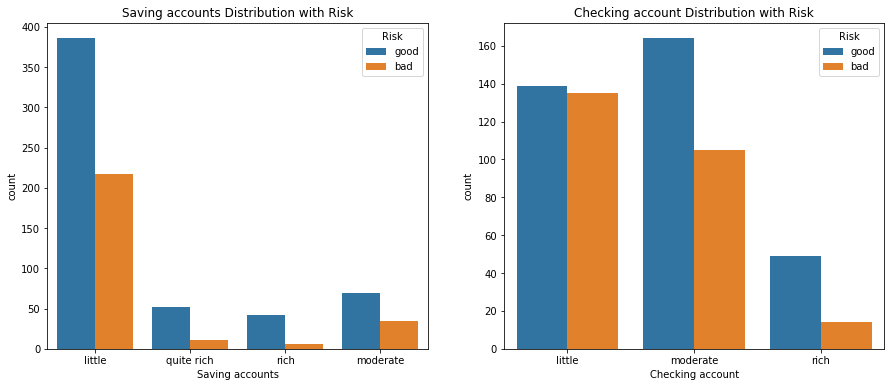

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig = sns.countplot(x='Saving accounts',hue='Risk', data=df, ax=ax[0]).set_title('Saving accounts Distribution with Risk')
fig = sns.countplot(x='Checking account',hue='Risk', data=df, ax=ax[1]).set_title('Checking account Distribution with Risk')

* People with more(rich) savings are less risk to the bank
* Almost 50% of the people who have little checking account are considered as a bad risk for the bank

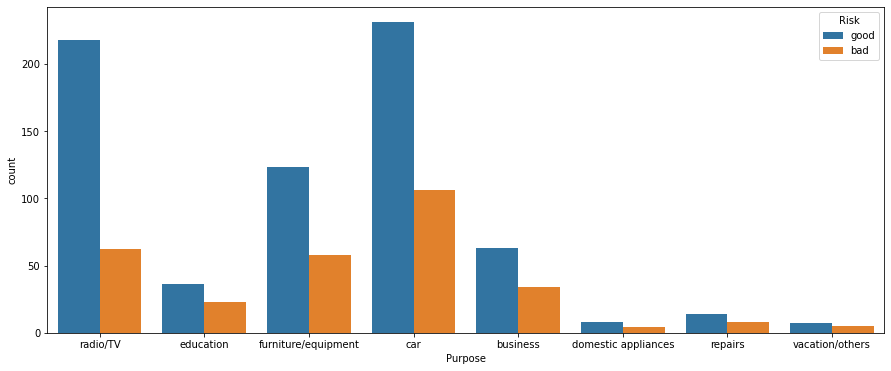

In [13]:
plt.figure(figsize=(15,6))
fig = sns.countplot(x='Purpose',hue='Risk', data=df)
plt.show()

* Most of the people take loan for Car or Radio/TV
* Loans for vacation and education are considered as a bad risk for the bank
* Loans for Radio/TV are good for bank

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Label encoding
for i in ['Sex', 'Housing', 'Purpose', 'Risk']:
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [16]:
def account_type(rating):
    if rating == 'little':
        return 1
    elif rating == 'moderate':
        return 2
    elif rating == 'quite rich':
        return 3
    elif rating == 'rich':
        return 4
    else:
        return 0

df['Saving accounts'] = df['Saving accounts'].apply(account_type)
df['Checking account'] = df['Checking account'].apply(account_type)

In [17]:
def house_type(type):
    if type == 'free':
        return 0
    elif type == 'rent':
        return 1
    elif type == 'own':
        return 2

df['Housing'] = df['Housing'].apply(house_type)

In [18]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,None,0,1,1169,6,5,1
1,22,0,2,None,1,2,5951,48,5,0
2,49,1,1,None,1,0,2096,12,3,1
3,45,1,2,None,1,1,7882,42,4,1
4,53,1,2,None,1,1,4870,24,1,0


## Model Building

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score